In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic data/train.csv", header=0,index_col=['PassengerId'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [5]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Embarked']
Target = ['Survived']
one_hot_cols = ['Pclass', 'Sex', 'Embarked']

In [6]:
X = df[features + Target]
X_train = pd.get_dummies(data = X[features] , prefix=one_hot_cols, columns = one_hode_cols)
X_train

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,22.0,1,0,0,0,1,0,1,0,0,1
2,38.0,1,0,1,0,0,1,0,1,0,0
3,26.0,0,0,0,0,1,1,0,0,0,1
4,35.0,1,0,1,0,0,1,0,0,0,1
5,35.0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,0,1,0,0,1,0,0,1
888,19.0,0,0,1,0,0,1,0,0,0,1
889,NaN,1,2,0,0,1,1,0,0,0,1


In [7]:
X_train = X_train.fillna(0)
X_train.head()

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,22.0,1,0,0,0,1,0,1,0,0,1
2,38.0,1,0,1,0,0,1,0,1,0,0
3,26.0,0,0,0,0,1,1,0,0,0,1
4,35.0,1,0,1,0,0,1,0,0,0,1
5,35.0,0,0,0,0,1,0,1,0,0,1


In [8]:
X_train.shape

(891, 11)

In [9]:
y_train = X[Target]
y_train.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [10]:
X_train.shape, y_train.shape

((891, 11), (891, 1))

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [12]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((623, 11), (268, 11), (623, 1), (268, 1))

In [13]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

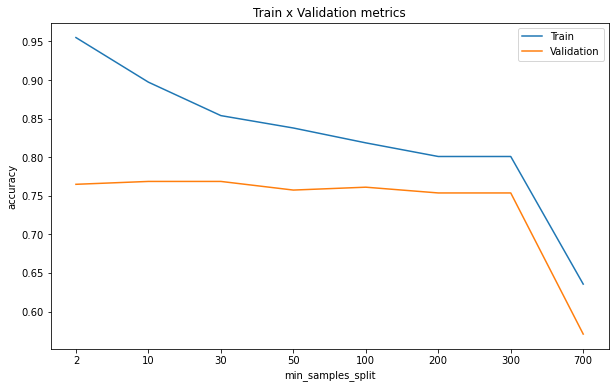

In [14]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 1).fit(X_train,y_train.values.ravel()) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.figure(figsize=(10,6))
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

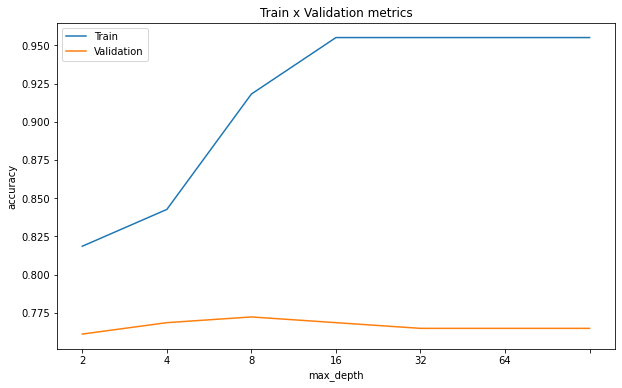

In [15]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 1).fit(X_train,y_train.values.ravel()) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.figure(figsize=(10,6))
plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

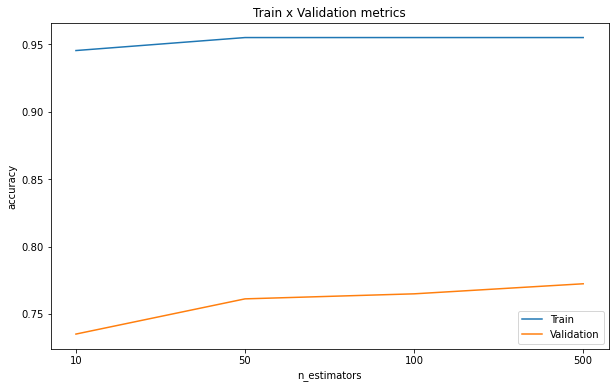

In [16]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 1).fit(X_train,y_train.values.ravel()) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.figure(figsize=(10,6))
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [17]:
param=dict(min_samples_split=min_samples_split_list, max_depth=max_depth_list, n_estimators=n_estimators_list)
param

{'min_samples_split': [2, 10, 30, 50, 100, 200, 300, 700],
 'max_depth': [2, 4, 8, 16, 32, 64, None],
 'n_estimators': [10, 50, 100, 500]}

In [18]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param)
grid_search.fit(X_train, y_train.values.ravel())
print(grid_search.best_estimator_)
print(grid_search.best_score_)

RandomForestClassifier(max_depth=16, min_samples_split=10, n_estimators=50)
0.836258064516129


In [31]:
model = RandomForestClassifier(min_samples_split=10, max_depth=16, n_estimators=50)
model.fit(X_train, y_train.values.ravel())
predictions_train = model.predict(X_train)
predictions_val = model.predict(X_val)
accuracy_train = accuracy_score(predictions_train,y_train)
accuracy_val = accuracy_score(predictions_val,y_val)
print(f'Accuracy for Train : {accuracy_train}')
print(f'Accuracy for Validations : {accuracy_val}')

Accuracy for Train : 0.8940609951845907
Accuracy for Validations : 0.7686567164179104


In [32]:
df_test = pd.read_csv("titanic data/test.csv", header=0,index_col=['PassengerId'])
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
X_test =  df_test[features]
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
892,3,male,34.5,0,0,Q
893,3,female,47.0,1,0,S
894,2,male,62.0,0,0,Q
895,3,male,27.0,0,0,S
896,3,female,22.0,1,1,S


In [34]:
X_test = pd.get_dummies(data = X_test, prefix=one_hode_cols, columns=one_hot_cols)
X_test.head()

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
892,34.5,0,0,0,0,1,0,1,0,1,0
893,47.0,1,0,0,0,1,1,0,0,0,1
894,62.0,0,0,0,1,0,0,1,0,1,0
895,27.0,0,0,0,0,1,0,1,0,0,1
896,22.0,1,1,0,0,1,1,0,0,0,1


In [35]:
X_test.shape

(418, 11)

In [36]:
X_test = X_test.fillna(0)

In [42]:
predictions_test = model.predict(X_test)
prediction = pd.DataFrame(data = predictions_test, index=df_test.index, columns = ['Survived'])
prediction

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0
...,...
1305,0
1306,1
1307,0


In [43]:
prediction.to_csv("predicted_test.csv")